In [0]:
#!pip install tensorflow==1.0                #Restart Runtime

In [0]:
#import tensorflow.compat.v1 as tf
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
mnist = input_data.read_data_sets("MNIST_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3e567ada20>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3e616b9da0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3e6aef0d68>)

In [25]:
mnist.train.images                                   #Pixel Values of 55k Images, 784 Each
#mnist.train.images[0]                               #Pixel values of 1st Image
#mnist.train.images[0].shape                         #784 Pixels 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
mnist.train.images.shape, mnist.validation.images.shape, mnist.test.images.shape         #70k images, 28*28

((55000, 784), (5000, 784), (10000, 784))

In [29]:
mnist.train.labels.shape, mnist.validation.labels.shape, mnist.test.labels.shape        

((55000,), (5000,), (10000,))

In [32]:
mnist.train.labels                   #Label(Digit) for Each Image
#mnist.train.labels[0]               #First Training Image is a 7

#We Want one hot encoding of labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
mnist.train.labels.shape, mnist.validation.labels.shape, mnist.test.labels.shape        #label - 9 zeros, 1 one

((55000, 10), (5000, 10), (10000, 10))

In [37]:
mnist.train.labels[0]                #First Training Image is a 7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

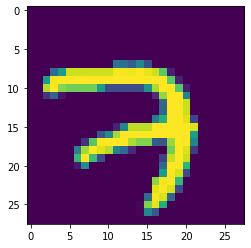

In [45]:
import matplotlib.pyplot as plt

first_image = mnist.train.images[0]                       #Flattened ==> Reshape 
plt.imshow(first_image.reshape(28,28))


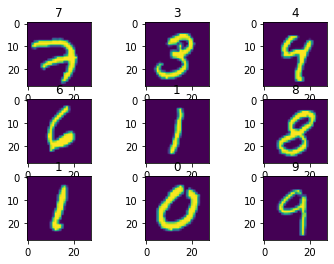

In [55]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28))
    plt.title(mnist.train.labels[i].nonzero()[0][0])

Initializing Random Numbers


In [69]:
rand = tf.random_normal([1])
rand

<tf.Tensor 'random_normal_13:0' shape=(1,) dtype=float32>

In [68]:
with tf.Session() as sess:
  print(tf.random_normal([1]).eval())
  sess.run(tf.global_variables_initializer())
  print(rand.eval())

[0.35465997]
[-2.2064207]


In [0]:
# Initializing Weights
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_Classes = 10

weights = {
              'h1' : tf.Variable(tf.random_normal([n_input,n_hidden1])),
              'h2' : tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
              'out' : tf.Variable(tf.random_normal([n_hidden2,n_Classes]))     
}

biases = {
              'h1' : tf.Variable(tf.random_normal([n_hidden1])),                 #Biases going to hidden Layer 1
              'h2' : tf.Variable(tf.random_normal([n_hidden2])),
              'out' : tf.Variable(tf.random_normal([n_Classes]))       
}

In [0]:
#Forward Prop
def forward_prop(x,weights,biases):
  in_layer1 = tf.matmul(x,weights['h1']) + biases['h1']                   #X not known yet
  out_layer1 = tf.nn.relu(in_layer1)

  in_layer2 = tf.matmul(out_layer1,weights['h2']) + biases['h2'] 
  out_layer2 = tf.nn.relu(in_layer2) 

  output = tf.matmul(out_layer2,weights['out']) + biases['out'] 

  return output

In [0]:
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_Classes])

In [0]:
pred = forward_prop(x,weights,biases)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [139]:
for i in range(10):
  c,_= sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
  print(int(c),end=' ')

1972 1203 810 688 589 477 358 254 200 180 

In [141]:
batch_size = 100
for i in range(10):                   #NumIterations
  num_batches = int(mnist.train.num_examples/batch_size)
  total_cost = 0
  for i in range(num_batches):
    batch_x,batch_y = mnist.train.next_batch(batch_size)
    c , _ = sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
    total_cost += c
  print(int(total_cost), end=' ')

1009 778 807 682 571 543 513 408 371 364 

In [144]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)

correct_predictions = tf.equal(predictions,correct_labels)

predictions, correct_predictions = sess.run([predictions,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_predictions.sum()              #96% Accuracy

9601

In [149]:
print("Accuracy =", correct_predictions.sum()*100/mnist.test.num_examples,"%")

Accuracy = 96.01 %
